# Teste de Kolmogorov Smirnov

### Grupo: Erlon Lacerda , Maria Eduarda Bandeira

## Implementação

Xi | Fabs | Fac | Fobs | Zi | Fesp | |Fesp(Xi) - Fobs(Xi)| | |Fesp(Xi) - Fobs(Xi-1)|

Xi: Os valores únicos do conjunto utilizado

Fabs: Quantidade de vezes que esse valor se repete na amostra

Fac: Frequencia acumulada da frequencia absoluta

Fobs: Frequencia acumulada dividido pela quantidade de valores

Zi: valor x seguindo a distribuição normal

Fesp: Valor de Zi na tabela normal

In [19]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [35]:
# Adriel e Kamily

def generate_sample(count, min_val, max_val):
    probabilidades = [1, 2, 3, 3.5, 5.5, 7, 5.5, 3.5, 3, 2, 1]

    #normalizar as probabilidades para somar 1
    probabilidades_normalizadas = [p / sum(probabilidades) for p in probabilidades]

    #gera a amostra aleatória com base nas probabilidades
    amostra_aleatoria = []
    for _ in range(count):
        valor = random.choices(np.linspace(min_val, max_val, 1000), weights=probabilidades_normalizadas)[0] #esse [0] é pra tirar o valor único da lista
        amostra_aleatoria.append(valor)

    return amostra_aleatoria

In [37]:
import numpy as np

def generate_sample(n, low, high, num_vars=10):
    return np.sum(np.random.uniform(low, high, (n, num_vars)), axis=1) / num_vars

In [39]:
## https://stats.stackexchange.com/questions/113230/generate-random-numbers-following-a-distribution-within-an-interval

def generate_normal_random_values(count, min_val, max_val):
    mn = (max_val - min_val) / 2

    X = np.random.normal(loc=mn, scale=mn/3, size=count)
    X = np.clip(X, min_val, max_val)

    return X

In [40]:
def plot(Xi, ac_dist,  label: str, ax=None):
    if(ax):
        ax.plot(Xi.values, ac_dist.values, label=label)
    plt.plot(Xi.values, ac_dist.values, label=label)

def plot_difference(Xi, obs, esp, ax=None):
    X = Xi.values
    y1 = esp.values
    y2 = obs.values

    difference = []
    for i in range(len(y1)):
        difference.append(y2[i] - y1[i])

    for i in range(len(esp)):
        if(ax):
            ax.plot([X[i], X[i]], [y1[i], y2[i]], color='red', linestyle='--', alpha=0.5)
        plt.plot([X[i], X[i]], [y1[i], y2[i]], color='red', linestyle='--', alpha=0.5)
        #plt.text(X[i], (y1[i] + y2[i]) / 2, f'{difference[i]:.2f}', ha='left', va='bottom')
    if(ax):
        ax.plot([X[0], X[0]], [y1[0], y2[0]], color='red', linestyle='--', alpha=0.5, label='Diferença')
    plt.plot([X[0], X[0]], [y1[0], y2[0]], color='red', linestyle='--', alpha=0.5, label='Diferença')

def show_plot(title: str, ax=None):
    if(ax):
        ax.title.set_text(title)
        ax.set_xlabel('Valor')
        ax.set_ylabel('Frequência Acumulada')
        ax.legend(loc='upper left')
        ax.grid(True)
        ax.show()
    plt.title(title)
    plt.xlabel('Valor')
    plt.ylabel('Frequência Acumulada')
    plt.legend(loc='upper left')

    plt.grid(True)
    plt.show()

In [41]:
def statistics(values):
    # Informações importantes sobre o conjunto de valores

    media = np.mean(values)
    var = np.var(values)
    dp = np.std(values)
    cont = len(values)
    xi = list(set(values))
    cont_unicos = len(xi)

    return media, var, dp, cont, xi, cont_unicos

In [42]:
colunas = ['Xi',
           'Fabs',
           'Fac',
           'Fobs',
           'Zi',
           'Fesp',
           '|Fesp(Xi) - Fobs(Xi)|',
           '|Fesp(Xi) - Fobs(Xi-1)|']

In [43]:
def treat_values(values):
    values = [round(x, ndigits=1) for x in values]
    values = np.array(values)
    return values

In [44]:
def kolmogorov_smirnov_critico(n):
    # table of critical values for the kolmogorov-smirnov test - 95% confidence
    # Source: https://www.soest.hawaii.edu/GG/FACULTY/ITO/GG413/K_S_Table_one_Sample.pdf
    # Source: http://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/
    # alpha = 0.05 (95% confidential level)

    if n <= 40:
        # valores entre 1 e 40
        kolmogorov_critico = [0.97500, 0.84189, 0.70760, 0.62394, 0.56328, 0.51926, 0.48342, 0.45427, 0.43001, 0.40925,
                      0.39122, 0.37543, 0.36143, 0.34890, 0.33760, 0.32733, 0.31796, 0.30936, 0.30143, 0.29408,
                      0.28724, 0.28087, 0.27490, 0.26931, 0.26404, 0.25907, 0.25438, 0.24993, 0.24571, 0.24170,
                      0.23788, 0.23424, 0.23076, 0.22743, 0.22425, 0.22119, 0.21826, 0.21544, 0.21273, 0.21012]
        ks_critico = kolmogorov_critico[n - 1]
    elif n > 40:
        # valores acima de 40:
        kolmogorov_critico = 1.36/(np.sqrt(n))
        ks_critico = kolmogorov_critico
    else:
        pass

    return ks_critico

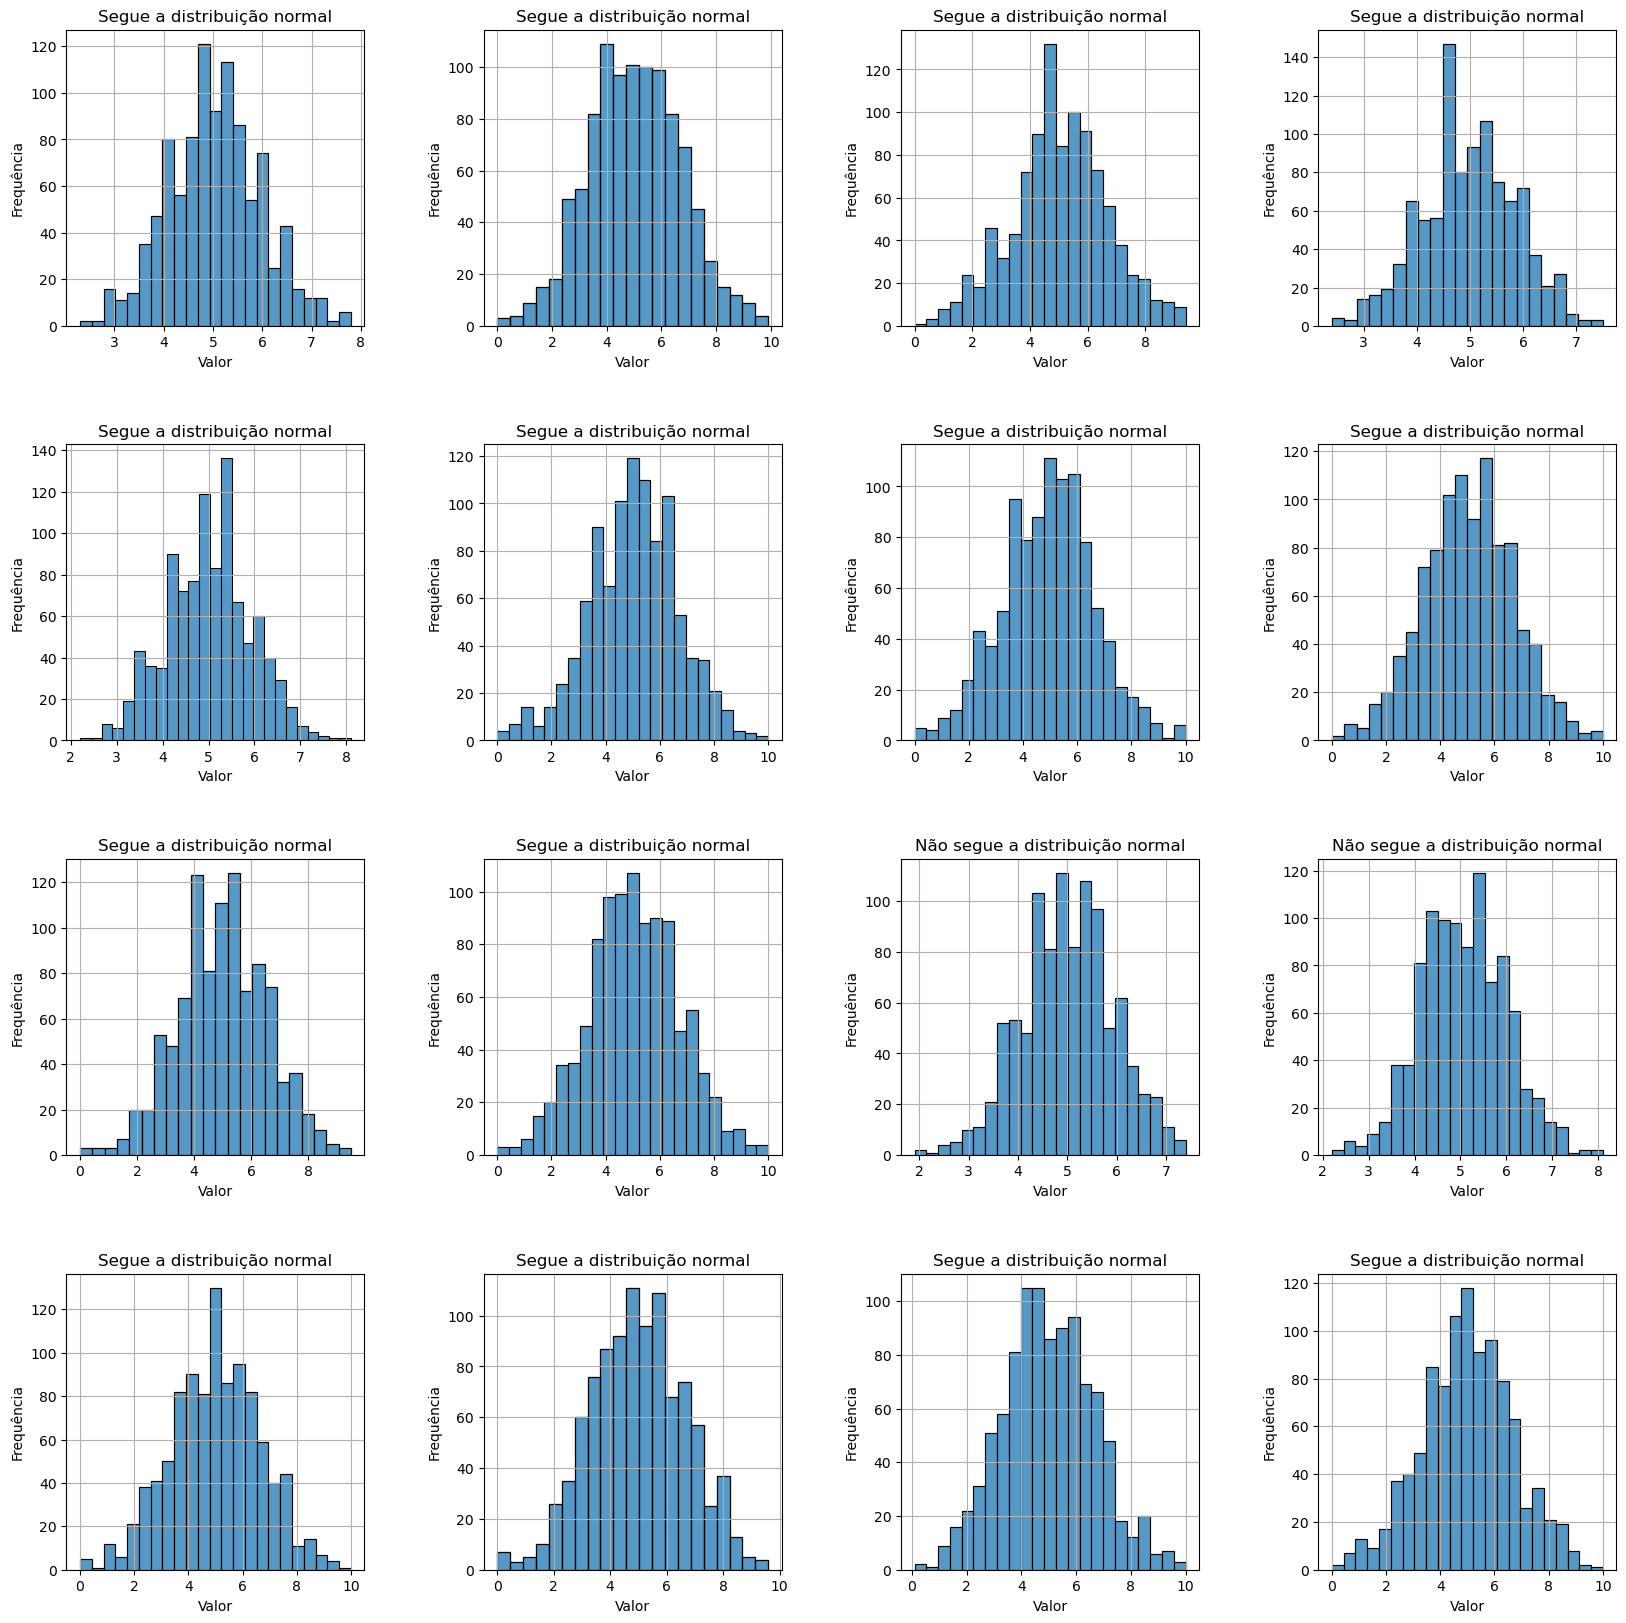

In [48]:
is_accepted = []
is_accepted_test = []

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

fns = [generate_sample, generate_normal_random_values]

for i in range(4):
    is_accepted_child = []
    is_accepted_test_child = []
    for j in range(4):

        valores = random.choice(fns)(1000, 0, 10)

        # valores = generate_normal_random_values(1000, 0, 10)
        valores = treat_values(valores)

        media, var, dp, cont, xi, cont_unicos = statistics(valores)

        fabs = pd.Series(valores).value_counts()
        fabs = fabs.sort_index()
        # dicionário para mapear os valores de 'Xi' para 'Fabs'
        mapa_valores = dict(zip(fabs.index, fabs.values))

        tabela = pd.DataFrame(columns=colunas)
        tabela['Xi'] = xi
        tabela['Fabs'] = tabela['Xi'].map(mapa_valores)
        tabela = tabela.sort_values(by='Xi').reset_index(drop=True)
        tabela['Fac'] = tabela['Fabs'].cumsum()
        tabela['Fobs'] = tabela['Fac'] / cont
        tabela['Zi'] = (tabela['Xi'] - media) / dp
        tabela['Fesp'] = stats.norm.cdf(tabela['Zi'])
        tabela['|Fesp(Xi) - Fobs(Xi)|'] = abs(tabela['Fesp'] - tabela['Fobs'])
        tabela['|Fesp(Xi) - Fobs(Xi-1)|'] = abs(tabela['Fesp'] - tabela['Fobs'].shift(fill_value=0))

        Dcalc = max([max(tabela['|Fesp(Xi) - Fobs(Xi-1)|']), max(tabela['|Fesp(Xi) - Fobs(Xi)|'])])
        Dc = kolmogorov_smirnov_critico(cont)
        
        if Dc >= Dcalc:
            is_accepted_child.append(True)
        else:
            is_accepted_child.append(False)

        # Testando com a biblioteca padrão
        ks_stat, ks_pvalue = stats.kstest(valores, 'norm', args=(media, dp))
        alpha = 0.05

        if ks_pvalue < alpha:
            is_accepted_test_child.append(False)
        else:
            is_accepted_test_child.append(True)

        #sns.histplot(valores)

        if(is_accepted_child[j]):
            axs[i][j].set_title('Segue a distribuição normal')
        else:
            axs[i][j].set_title('Não segue a distribuição normal')

        axs[i][j].set_xlabel('Valor')
        axs[i][j].set_ylabel('Frequência')
        axs[i][j].grid(True)
        sns.histplot(valores, ax=axs[i][j])
    is_accepted.append(is_accepted_child)
    is_accepted_test.append(is_accepted_test_child)

    
plt.show()

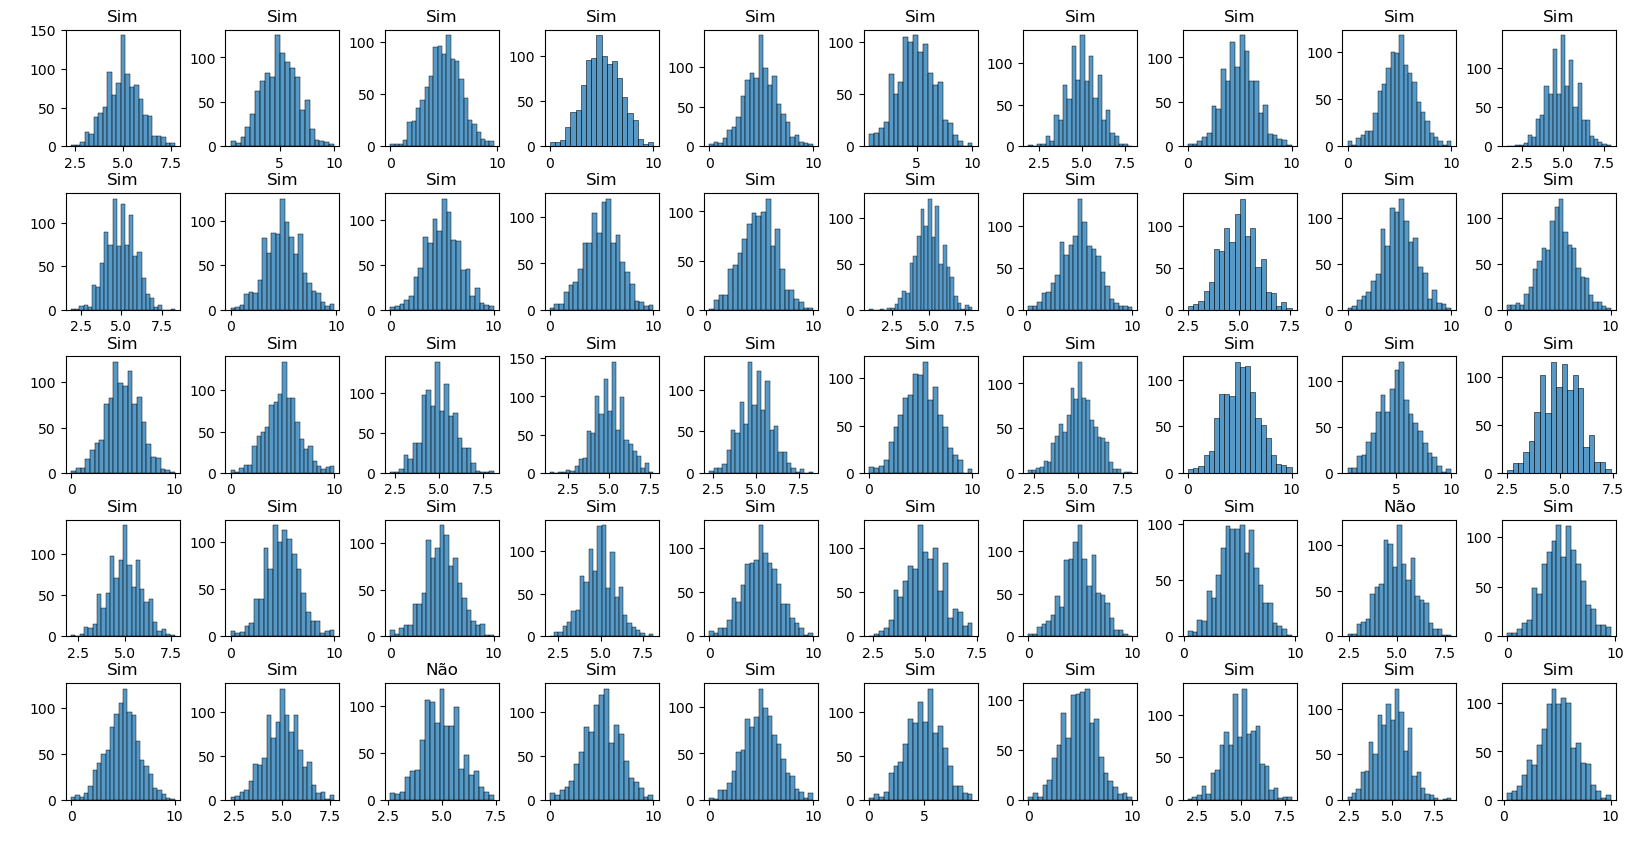

In [50]:
is_accepted = []
is_accepted_test = []

fig, axs = plt.subplots(nrows=5, ncols=10, figsize=(20, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i in range(5):
    is_accepted_child = []
    is_accepted_test_child = []
    for j in range(10):

        valores = random.choice(fns)(1000, 0, 10)

        # valores = generate_normal_random_values(1000, 0, 10)
        valores = treat_values(valores)

        media, var, dp, cont, xi, cont_unicos = statistics(valores)

        fabs = pd.Series(valores).value_counts()
        fabs = fabs.sort_index()
        # dicionário para mapear os valores de 'Xi' para 'Fabs'
        mapa_valores = dict(zip(fabs.index, fabs.values))

        tabela = pd.DataFrame(columns=colunas)
        tabela['Xi'] = xi
        tabela['Fabs'] = tabela['Xi'].map(mapa_valores)
        tabela = tabela.sort_values(by='Xi').reset_index(drop=True)
        tabela['Fac'] = tabela['Fabs'].cumsum()
        tabela['Fobs'] = tabela['Fac'] / cont
        tabela['Zi'] = (tabela['Xi'] - media) / dp
        tabela['Fesp'] = stats.norm.cdf(tabela['Zi'])
        tabela['|Fesp(Xi) - Fobs(Xi)|'] = abs(tabela['Fesp'] - tabela['Fobs'])
        tabela['|Fesp(Xi) - Fobs(Xi-1)|'] = abs(tabela['Fesp'] - tabela['Fobs'].shift(fill_value=0))

        Dcalc = max([max(tabela['|Fesp(Xi) - Fobs(Xi-1)|']), max(tabela['|Fesp(Xi) - Fobs(Xi)|'])])
        Dc = kolmogorov_smirnov_critico(cont)
        
        if Dc >= Dcalc:
            is_accepted_child.append(True)
        else:
            is_accepted_child.append(False)

        # Testando com a biblioteca padrão
        ks_stat, ks_pvalue = stats.kstest(valores, 'norm', args=(media, dp))
        alpha = 0.05

        if ks_pvalue < alpha:
            is_accepted_test_child.append(False)
        else:
            is_accepted_test_child.append(True)


        #sns.histplot(valores)
        if(is_accepted_child[j]):
            axs[i][j].set_title('Sim')
        else:
            axs[i][j].set_title('Não')
        
        axs[i][j].set_xlabel('⠀')
        axs[i][j].set_ylabel('⠀')
        #axs[i][j].grid(True)
        sns.histplot(valores, ax=axs[i][j])

    is_accepted.append(is_accepted_child)
    is_accepted_test.append(is_accepted_test_child)

    
plt.show()


    

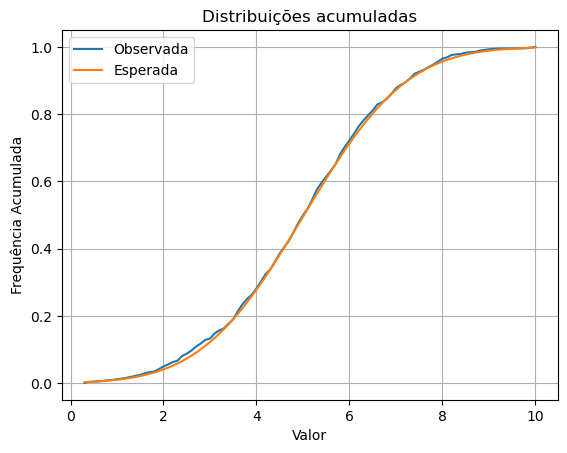

In [51]:
plot(tabela['Xi'], tabela['Fobs'], 'Observada')
plot(tabela['Xi'], tabela['Fesp'], 'Esperada')

show_plot('Distribuições acumuladas')

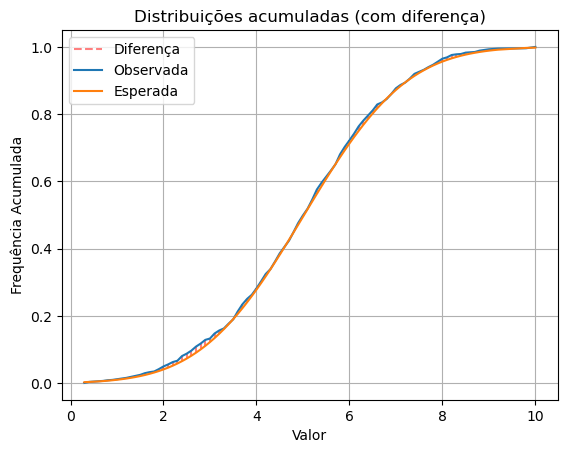

In [52]:
plot_difference(tabela['Xi'], tabela['Fobs'], tabela['Fesp'])

plot(tabela['Xi'], tabela['Fobs'], 'Observada')
plot(tabela['Xi'], tabela['Fesp'], 'Esperada')

show_plot('Distribuições acumuladas (com diferença)')

<img src='FPQsReHWYAcbjDT--@0,5x.jpg' alt='normar' width="400px">